In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pointCollection as pc


In [ ]:
%matplotlib notebook


First, let's check the different dz mosaics for consistent cell area

In [9]:
thedir='/Volumes/ice2/ben/ATL14_test/rel002_new/'

In [13]:
dz_1km = pc.grid.data().from_h5(thedir+'/dz.h5', group='dz')

In [17]:
dz_10km = pc.grid.data().from_h5(thedir+'/dz_10km.h5', group='avg_dz_10000m')

In [25]:
dz_20km = pc.grid.data().from_h5(thedir+'/dz_20km.h5', group='avg_dz_20000m')

In [28]:
dz_40km = pc.grid.data().from_h5(thedir+'/dz_40km.h5', group='avg_dz_40000m')

In [29]:
(np.nansum(dz_40km.cell_area)-np.nansum(dz_1km.cell_area))/1.e6

4370.514769533936

In [22]:
! h5ls {thedir+'/z0.h5/z0'}

cell_area                Dataset {27601, 16001}
count                    Dataset {27601, 16001}
mask                     Dataset {27601, 16001}
misfit_rms               Dataset {27601, 16001}
misfit_scaled_rms        Dataset {27601, 16001}
sigma_z0                 Dataset {27601, 16001}
x                        Dataset {16001}
y                        Dataset {27601}
z0                       Dataset {27601, 16001}


In [24]:
import h5py
with h5py.File(thedir+'/z0.h5','r') as h5f:
    ca_100m = np.array(h5f['/z0/cell_area'])
    mask_100m = np.array(h5f['/z0/mask'])
(np.nansum(dz_1km.cell_area)-np.nansum(ca_100m*mask_100m))/1.e6

1.9775390625e-08

<IPython.core.display.Javascript object>


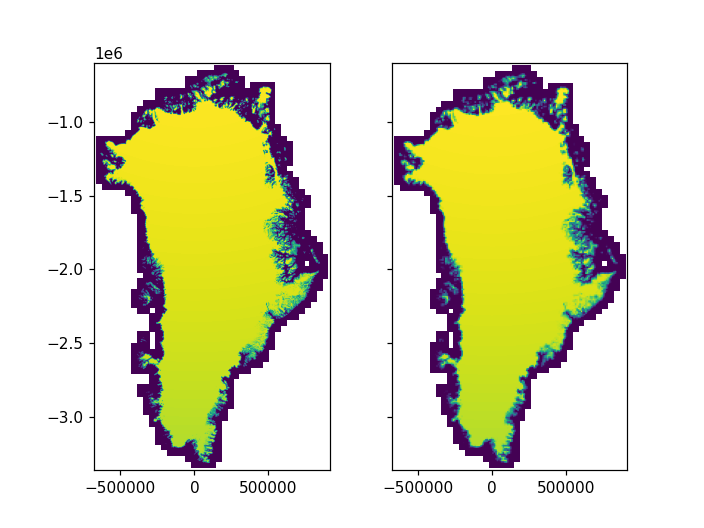

In [20]:
fig=plt.figure(); 
hax=fig.subplots(1,2, sharex=True, sharey=True)

hax[0].imshow(dz_1km.cell_area, extent=dz_1km.extent, origin='lower')
hax[1].imshow(dz_10km.cell_area, extent=dz_10km.extent, origin='lower')

In [31]:
dzi = dz_1km.interp(dz_10km.x, dz_10km.y, gridded=True, field='cell_area')

<IPython.core.display.Javascript object>


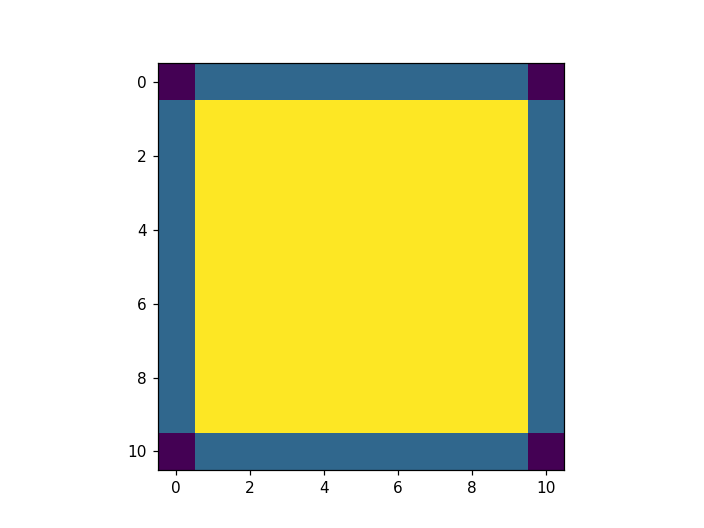

In [49]:
K=np.ones([11, 11])
K[0,:]/=2
K[-1,:]/=2
K[:,0]/=2
K[:,-1]/=2
plt.figure()
plt.imshow(K)

from scipy.ndimage import convolve
ca_fill=dz_1km.cell_area.copy()
ca_fill[~np.isfinite(ca_fill)]=0
ca_sm_10km = convolve(ca_fill, K, mode='constant' )


In [50]:
[ca_sm_10km.shape,
dz_1km.x.shape]

[(2761, 1601), (1601,)]

<IPython.core.display.Javascript object>


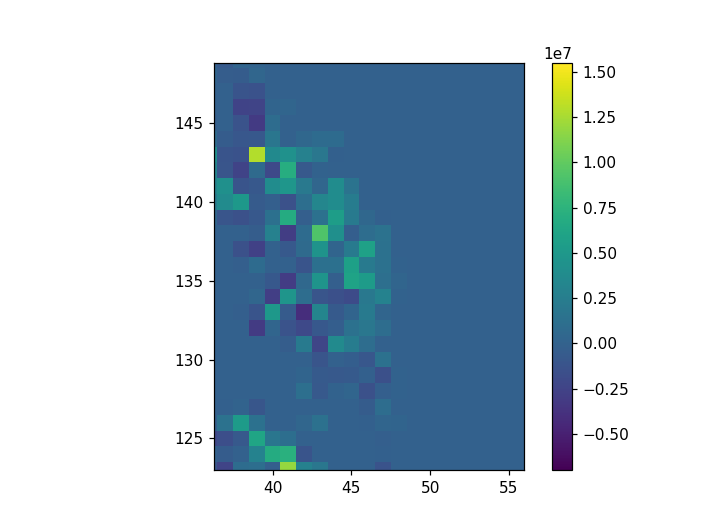

In [67]:
ca_interp=pc.grid.data().from_dict({'x':dz_1km.x-1000, 'y':dz_1km.y-1000,'z':ca_sm_10km}).interp(dz_10km.x, dz_10km.y, gridded=True)

plt.figure(); plt.imshow(dz_10km.cell_area - ca_interp, origin='lower'); plt.colorbar()

In [40]:
[dz_10km.cell_area[150, 75], dzi[150, 75]*np.sum(K), dz_10km.cell_area[150, 75] - dzi[150, 75]*np.sum(K)]

[101710040.44038907, 101705458.88589744, 4581.554491624236]

In [42]:
np.sum(np.isfinite(dz_10km.cell_area))*5000/1.e6

129.92

In [16]:
! h5ls {thedir+'/dz_10km.h5'}

avg_dz_10000m            Group


In [ ]:
thefile='/home/ben/git_repos/surfaceChange/ATL15.h5'
thefile='/Volumes/ice2/ben/ATL14_test/001/ATL15.h5'
V0={}
dV0={}
A0={}
for group in ['', '_10km','_20km', '_40km']:   
    D15=pc.grid.data().from_h5(thefile, group='height_change'+group)
    field='cell_area'+group
    A=getattr(D15, field)
    dh=getattr(D15, 'delta_h'+group)
    dhdt=getattr(D15, 'dhdt_lag1'+group)
    A[A>1.e16]=np.NaN
    A0[group]=np.nansum(A)
    V0[group] = np.array([np.nansum(A*dh[:,:,ii]) for ii in range(dh.shape[2])])
    dV0[group] = np.array([np.nansum(A*dhdt[:,:,ii]) for ii in range(dhdt.shape[2])])


In [ ]:
Acell = {'':1.e3**2, '_10km':1.e4**2, '_20km':2.e4**2, '_40km':4.e4**2}

{key:(A0[key]-A0[''])/Acell[key] for key in A0}

In [ ]:
dhdt.shape

In [ ]:
{key:V0[key]-V0[''] for key in V0}

In [ ]:
{key:dV0[key]-dV0[''] for key in V0}

In [ ]:
plt.figure(); 
plt.plot(dV0['']/np.nansum(A0['']))
plt.plot(dV0['_10km']/np.nansum(A0['_10km']))
plt.plot(dV0['_20km']/np.nansum(A0['_20km']))
plt.plot(dV0['_40km']/np.nansum(A0['_40km']))
plt.legend(['1km', '10km', '20km', '40km'])

In [ ]:
hfig=plt.figure();
hax=hfig.subplots(1, 4, sharex=True, sharey=True)
for ii, av in enumerate(A0.keys()):
    D15=pc.grid.data().from_h5(thefile, group='height_change'+av)
    temp=getattr(D15, 'cell_area'+av)
    temp[temp>1.e15]=np.NaN
    hax[ii].imshow(getattr(D15, 'cell_area'+av), extent=D15.extent, origin='lower')

In [ ]:
D15=pc.grid.data().from_h5(thefile, group='height_change'+group)
D15

In [ ]:
av

In [ ]:
! h5ls /home/ben/git_repos/surfaceChange/ATL15.h5/height_change_10km